In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  precision_score, recall_score, f1_score, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [ ]:
data = pd.read_csv("breast_cancer.csv")

In [ ]:
data.head()

,S/N,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
0,1,2019,40,1,2,0,Right,0,Upper inner,0,Benign
1,2,2019,39,1,2,0,Left,0,Upper outer,0,Benign
2,3,2019,45,0,4,0,Left,0,Lower outer,0,Benign
3,4,2019,26,1,3,0,Left,0,Lower inner,1,Benign
4,5,2019,21,1,1,0,Right,0,Upper outer,1,Benign


In [ ]:
data = data[~data.apply(lambda row: row.astype(str).str.contains('#').any(), axis=1)]
data.rename(columns = {'Tumor Size (cm)':'TS'}, inplace = True)
data.rename(columns = {'Breast Quadrant':'BQ'}, inplace = True)

In [ ]:
data.head()

,S/N,Year,Age,Menopause,TS,Inv-Nodes,Breast,Metastasis,BQ,History,Diagnosis Result
0,1,2019,40,1,2,0,Right,0,Upper inner,0,Benign
1,2,2019,39,1,2,0,Left,0,Upper outer,0,Benign
2,3,2019,45,0,4,0,Left,0,Lower outer,0,Benign
3,4,2019,26,1,3,0,Left,0,Lower inner,1,Benign
4,5,2019,21,1,1,0,Right,0,Upper outer,1,Benign


In [ ]:
print(data.info())
print(data.shape)
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 0 to 212
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   S/N               205 non-null    int64 
 1   Year              205 non-null    object
 2   Age               205 non-null    int64 
 3   Menopause         205 non-null    int64 
 4   TS                205 non-null    object
 5   Inv-Nodes         205 non-null    object
 6   Breast            205 non-null    object
 7   Metastasis        205 non-null    object
 8   BQ                205 non-null    object
 9   History           205 non-null    object
 10  Diagnosis Result  205 non-null    object
dtypes: int64(3), object(8)
memory usage: 27.3+ KB
None
(205, 11)
S/N                 0
Year                0
Age                 0
Menopause           0
TS                  0
Inv-Nodes           0
Breast              0
Metastasis          0
BQ                  0
History             0
Diagnosis Result

In [ ]:
data['Age'] = data['Age'].astype(int)
data["TS"] = data["TS"].astype(float).astype(int)
print(data.dtypes)

S/N                  int64
Year                object
Age                  int64
Menopause            int64
TS                   int64
Inv-Nodes           object
Breast              object
Metastasis          object
BQ                  object
History             object
Diagnosis Result    object
dtype: object


In [ ]:
def label_encode_object_columns(df):
    object_columns = df.select_dtypes(include=['object']).columns
    label_encoders = {}
    for col in object_columns:
        label_encoders[col] = LabelEncoder()
        df[col] = label_encoders[col].fit_transform(df[col].astype(str))
    return df, label_encoders
print(label_encode_object_columns(data))

(     S/N  Year  Age  Menopause  TS  Inv-Nodes  Breast  Metastasis  BQ  \
0      1     0   40          1   2          0       1           0   2   
1      2     0   39          1   2          0       0           0   3   
2      3     0   45          0   4          0       0           0   1   
3      4     0   26          1   3          0       0           0   0   
4      5     0   21          1   1          0       1           0   3   
5      6     0   50          0   5          1       1           1   1   
6      7     0   58          0   6          1       1           1   3   
7      8     0   21          1   3          0       0           0   2   
8      9     0   35          1   4          0       0           0   3   
9     10     0   42          1   2          0       1           0   1   
10    11     0   41          1   7          1       1           1   1   
11    12     0   41          1  10          1       1           1   0   
12    13     0   50          0   5          1     

In [ ]:
# S/N ans Year raw data don't have any contribution to the model
data = data.drop('S/N', axis=1)
data = data.drop('Year', axis=1)
# Assuming your data is stored in a DataFrame called df
data, label_encoders = label_encode_object_columns(data.copy())
print(data.dtypes)

Age                 int64
Menopause           int64
TS                  int64
Inv-Nodes           int64
Breast              int64
Metastasis          int64
BQ                  int64
History             int64
Diagnosis Result    int64
dtype: object


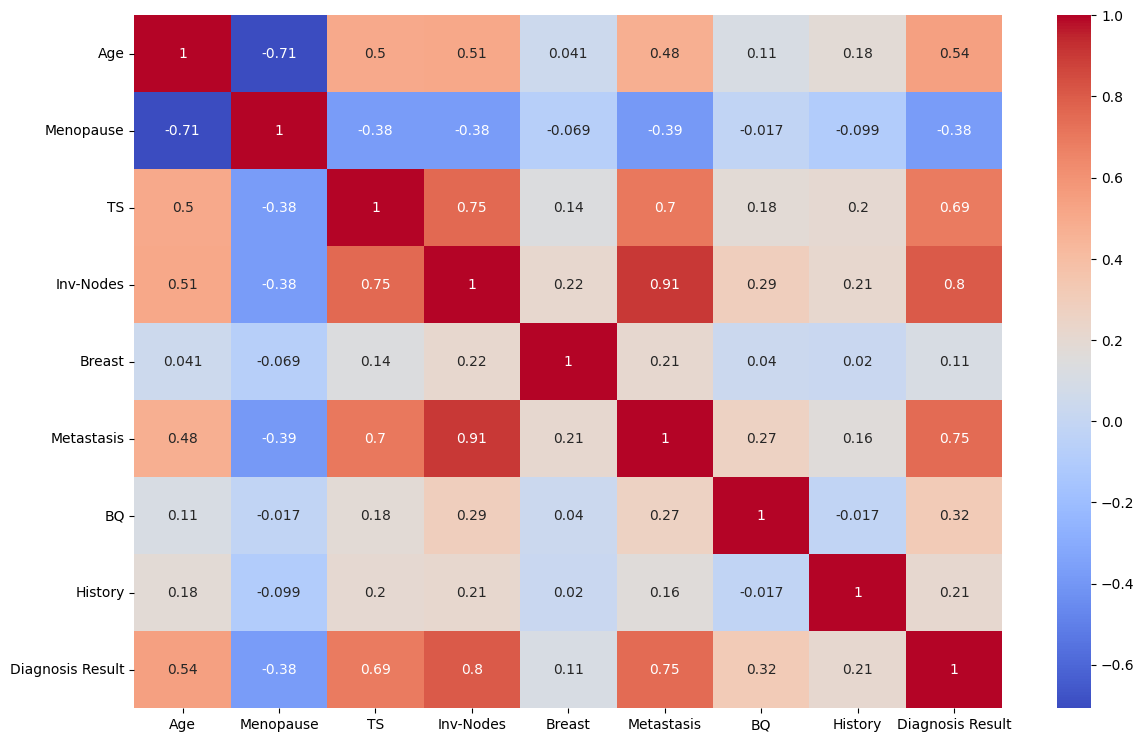

In [ ]:
corr = data.corr()
plt.figure(figsize=(14,9))
sns.heatmap(corr, annot=True, cmap='coolwarm')
#plt.savefig('heatmap.png')
plt.show()

In [ ]:
X, y = data.drop(columns='Diagnosis Result', axis=1), data['Diagnosis Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=100)

In [ ]:
def fit_model_metrics(x):
    x.fit(X_train, y_train)
    yhat = x.predict(X_test)
    y_known = x.predict(X_train)
    model = x.__class__.__name__
    accuracy = round(accuracy_score(y_test, yhat), 3)
    accuracy_train = round(accuracy_score(y_train, y_known), 3)
    precision = round(precision_score(y_test, yhat), 2)
    recall = round(recall_score(y_test, yhat), 2)
    f1 = round(f1_score(y_test, yhat), 2)
    return model, accuracy, accuracy_train, precision, recall, f1

In [ ]:
column_names = ['Model', 'Accuracy', 'Accuracy on Train', 'Precision', 'Recall', 'F1 Score']
score = []
LR = LogisticRegression(max_iter=100, penalty='l1', solver='liblinear')
score.append(fit_model_metrics(LR))
print(pd.DataFrame(score, columns=column_names))

                Model  Accuracy  Accuracy on Train  Precision  Recall  \
0  LogisticRegression     0.951              0.896        1.0    0.87   

   F1 Score  
0      0.93  


In [ ]:
# Saving the trained model
import pickle

In [ ]:
filename = 'Breast_cancer_model.sav'
pickle.dump(LR, open(filename, 'wb'))

In [ ]:
# Loading our model
loaded_model = pickle.load(open('Breast_cancer_model.sav','rb'))